In [14]:
# !pip install sklearn_crfsuite

In [15]:
import pandas as pd
import numpy as np
import re
from sklearn_crfsuite import CRF

In [ ]:

data = pd.read_csv("abc.csv")
print(data.shape)
data.head(5)

In [3]:
sentences = []
tags = []
i=0
while i<len(data):
    words=[]
    t=[]
    while (data.iloc[i,0])!="." and data.iloc[i,1] !='.':
        words.append(str(data.iloc[i,0]).lower())
        t.append(data.iloc[i,1])
        i=i+1
    words.append('.')
    t.append('.')
    sentences.append(np.array(words))
    tags.append(np.array(t))
    i=i+1
print(len(sentences))
print(len(tags))

13690
13690


In [4]:
print(len(sentences))
for i in range(5):
    print(sentences[i])
    print(tags[i])

13690
['thousands' 'of' 'demonstrators' 'have' 'marched' 'through' 'london' 'to'
 'protest' 'the' 'war' 'in' 'iraq' 'and' 'demand' 'the' 'withdrawal' 'of'
 'british' 'troops' 'from' 'that' 'country' '.']
['NNS' 'IN' 'NNS' 'VBP' 'VBN' 'IN' 'NNP' 'TO' 'VB' 'DT' 'NN' 'IN' 'NNP'
 'CC' 'VB' 'DT' 'NN' 'IN' 'JJ' 'NNS' 'IN' 'DT' 'NN' '.']
['families' 'of' 'soldiers' 'killed' 'in' 'the' 'conflict' 'joined' 'the'
 'protesters' 'who' 'carried' 'banners' 'with' 'such' 'slogans' 'as' '"'
 'bush' 'number' 'one' 'terrorist' '"' 'and' '"' 'stop' 'the' 'bombings'
 '"' '.']
['NNS' 'IN' 'NNS' 'VBN' 'IN' 'DT' 'NN' 'VBD' 'DT' 'NNS' 'WP' 'VBD' 'NNS'
 'IN' 'JJ' 'NNS' 'IN' '``' 'NNP' 'NN' 'CD' 'NN' '``' 'CC' '``' 'VB' 'DT'
 'NNS' '``' '.']
['they' 'marched' 'from' 'the' 'houses' 'of' 'parliament' 'to' 'a' 'rally'
 'in' 'hyde' 'park' '.']
['PRP' 'VBD' 'IN' 'DT' 'NNS' 'IN' 'NN' 'TO' 'DT' 'NN' 'IN' 'NNP' 'NNP' '.']
['police' 'put' 'the' 'number' 'of' 'marchers' 'at' '10,000' 'while'
 'organizers' 'claimed' 'it' 

[24, 30, 14, 15, 25, 24, 21, 28, 15, 25]
Counter({20: 725, 21: 685, 22: 683, 25: 649, 18: 642, 24: 638, 23: 624, 19: 621, 17: 571, 27: 541, 16: 538, 15: 536, 26: 535, 28: 480, 14: 477, 29: 449, 13: 408, 30: 365, 12: 356, 31: 350, 11: 334, 32: 281, 10: 280, 9: 227, 34: 209, 33: 208, 8: 160, 35: 158, 36: 138, 7: 120, 37: 99, 6: 98, 38: 91, 39: 88, 40: 60, 41: 45, 5: 41, 43: 30, 42: 27, 44: 18, 46: 15, 4: 13, 45: 12, 47: 11, 48: 11, 49: 9, 50: 7, 52: 5, 59: 3, 61: 3, 60: 3, 56: 3, 55: 2, 3: 2, 70: 1, 1: 1, 51: 1, 57: 1, 53: 1, 65: 1})


<BarContainer object of 60 artists>

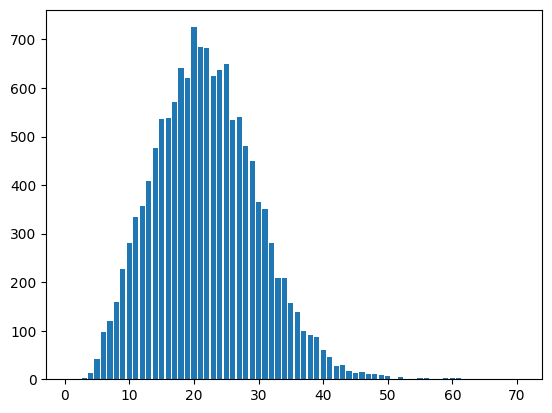

In [5]:
#statistics on sentences 
from collections import Counter 
import matplotlib.pyplot as plt

len_sentences = [len(s) for s in sentences]
print(len_sentences[:10])
counter = Counter(len_sentences)
print(counter)
plt.bar(counter.keys(), counter.values())

In [6]:
from sklearn.model_selection import train_test_split
 
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences, tags, test_size=0.2)

In [7]:
def features(sentence,index):
    return {
        'is_first_capital':int(sentence[index][0].isupper()),
        'is_first_word': int(index==0),
        'is_last_word':int(index==len(sentence)-1),
        'is_complete_capital': int(sentence[index].upper()==sentence[index]),
        'prev_word':'' if index==0 else sentence[index-1],
        'next_word':'' if index==len(sentence)-1 else sentence[index+1],
        'is_numeric':int(sentence[index].isdigit()),
        'is_alphanumeric': int(bool((re.match('^(?=.*[0-9]$)(?=.*[a-zA-Z])',sentence[index])))),
        'prefix_1':sentence[index][0],
        'prefix_2': sentence[index][:2],
        'prefix_3':sentence[index][:3],
        'prefix_4':sentence[index][:4],
        'suffix_1':sentence[index][-1],
        'suffix_2':sentence[index][-2:],
        'suffix_3':sentence[index][-3:],
        'suffix_4':sentence[index][-4:],
        'word_has_hyphen': 1 if '-' in sentence[index] else 0
    }

In [8]:
def prepareData(tagged_sentences):
    X=[]
    for sentences in tagged_sentences:
        X.append([features(sentences, index) for index in range(len(sentences))])
    return X

In [11]:
X_train = prepareData(train_sentences)
y_train = train_tags
X_test = prepareData(test_sentences)
y_test =  test_tags

In [12]:
X_train[1][0]

{'is_first_capital': 0,
 'is_first_word': 1,
 'is_last_word': 0,
 'is_complete_capital': 0,
 'prev_word': '',
 'next_word': 'officials',
 'is_numeric': 0,
 'is_alphanumeric': 0,
 'prefix_1': 'i',
 'prefix_2': 'ir',
 'prefix_3': 'ira',
 'prefix_4': 'iraq',
 'suffix_1': 'i',
 'suffix_2': 'qi',
 'suffix_3': 'aqi',
 'suffix_4': 'raqi',
 'word_has_hyphen': 0}

In [16]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.01,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)
#crf.fit(X_train, y_train)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass


In [17]:
y_pred=crf.predict(X_test)
y_pred_train=crf.predict(X_train)

In [18]:
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers

#F1 score test
print(metrics.flat_f1_score(y_test, y_pred,average='weighted',labels=crf.classes_))
#Accuracy score test
print(metrics.flat_accuracy_score(y_test,y_pred))

0.9697085825718667
0.969761264346693


In [19]:
#F1 score train
print(metrics.flat_f1_score(y_train, y_pred_train,average='weighted',labels=crf.classes_))
#Accuracy score train
print(metrics.flat_accuracy_score(y_train,y_pred_train))

0.9931257023869586
0.9931316850488154


In [20]:
labels1=crf.classes_
labels1

['DT',
 'JJ',
 'NN',
 'VBD',
 'VBN',
 '.',
 'NNS',
 'VBP',
 'IN',
 'CD',
 'JJS',
 ',',
 'VBG',
 'NNP',
 'RB',
 'VBZ',
 'PRP',
 'MD',
 'VB',
 'TO',
 'CC',
 'WDT',
 'PRP$',
 'WP',
 'LRB',
 'POS',
 'RRB',
 'RP',
 '``',
 'NNPS',
 'JJR',
 'PDT',
 'RBR',
 'EX',
 ':',
 '$',
 'WRB',
 'RBS',
 ';',
 'WP$',
 'UH']

In [29]:
from underthesea import word_tokenize

In [35]:
sent = "I would love to travel in Vietnam"

senft = prepareData([word_tokenize(sent)])
crf.predict(senft)

[['``', 'MD', 'VB', 'TO', 'VB', 'IN', 'NNP']]

In [34]:
import nltk

def postager(sent):
    sent = nltk.word_tokenize(sent.lower())
    x_data = prepareData([sent])
    y_pred = crf.predict(x_data)
    return y_pred

sent = 'the report says he also suffered from other heart ailments .'
postager(sent)

[['DT', 'NN', 'VBZ', 'PRP', 'RB', 'VBD', 'IN', 'JJ', 'NN', 'NNS', '.']]